In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [307]:
titanic = pd.read_csv('train.csv')
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [254]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [255]:
titanic.shape

(891, 12)

In [144]:
titanic.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [256]:
# Dropping Duplicates if any
titanic=titanic.drop_duplicates()
titanic.shape

(891, 12)

In [257]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [258]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [259]:
# do a sanity check on the dataframe for missing values.
# percentage of missing values in each column
round(titanic.isnull().sum()/len(titanic.index), 2)*100

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            20.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.0
Embarked        0.0
dtype: float64

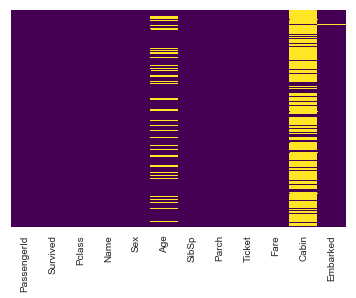

In [260]:
# Pictorial represesentaion : get Info
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [262]:
sns.set_style('whitegrid')
titanic['Survived'].value_counts()


0    549
1    342
Name: Survived, dtype: int64

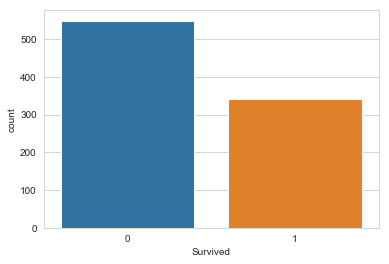

In [263]:
sns.countplot(x='Survived',data=titanic)

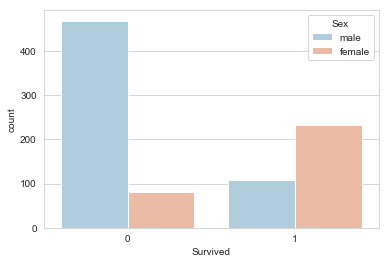

In [264]:
sns.countplot(x='Survived',data=titanic,hue='Sex',palette='RdBu_r')

In [265]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [266]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

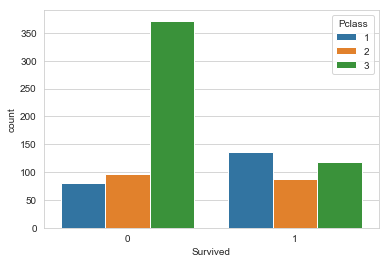

In [267]:
sns.countplot(x='Survived',data=titanic,hue='Pclass')

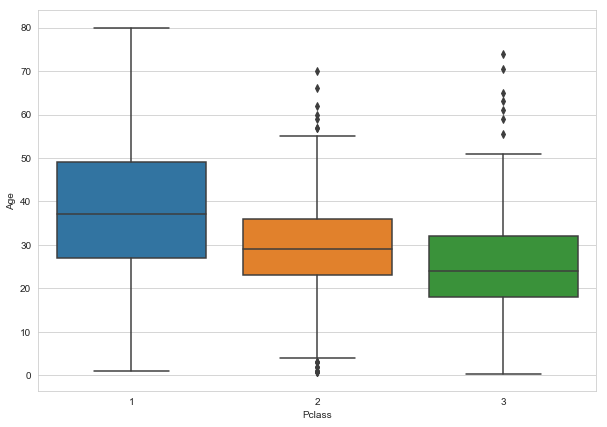

In [15]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=titanic)

## Let's compute avg age values to null age

In [308]:
def add_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return int(titanic[titanic['Pclass'] == Pclass]['Age'].mean())
    else:
        return Age

In [309]:
titanic['Age'] = titanic[['Age','Pclass']].apply(add_age,axis=1)

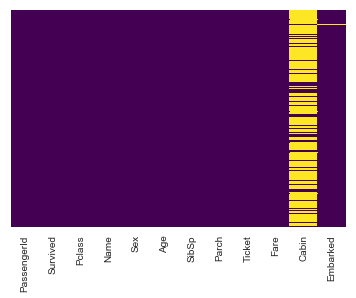

In [310]:
# Pictorial represesentaion : get Info
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [311]:
# do a sanity check on the dataframe for missing values.
# percentage of missing values in each column
round(titanic.isnull().sum()/len(titanic.index), 2)*100

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age             0.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.0
Embarked        0.0
dtype: float64

In [312]:
titanic.drop('Cabin',axis=1,inplace=True)

In [313]:
round(titanic.isnull().sum()/len(titanic.index), 2)*100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [315]:
# removing or droping null values
titanic.dropna(inplace=True)

In [316]:
#titanic['Embarked'].isna().sum()

0

In [284]:
#titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [285]:
#titanic['Embarked'].fillna("Q", inplace = True) 

In [317]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [318]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [319]:
# converting categrical column using get_dummies
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
titanic=pd.concat([titanic,sex],axis=1)

In [320]:
# converting categrical column using get_dummies
embarked = pd.get_dummies(titanic['Embarked'],drop_first=True)
titanic=pd.concat([titanic,embarked],axis=1)

In [321]:
pclass = pd.get_dummies(titanic['Pclass'],drop_first=True)
titanic=pd.concat([titanic,pclass],axis=1)

In [322]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [323]:
titanic = titanic.drop(['PassengerId','Pclass','Name','Sex','Ticket','Embarked'],axis=1)

In [324]:
# Creating master copy seprate
tit1 = titanic

In [325]:
tit1.isna().sum()

Survived    0
Age         0
SibSp       0
Parch       0
Fare        0
male        0
Q           0
S           0
2           0
3           0
dtype: int64

In [167]:
#m = tit2['Fare'].mean()

In [168]:
#tit2['Fare'] = tit2['Fare'].div(m).round(2)

In [326]:
final_clean_data = tit1
print(final_clean_data.head(2))

   Survived   Age  SibSp  Parch     Fare  male  Q  S  2  3
0         0  22.0      1      0   7.2500     1  0  1  0  1
1         1  38.0      1      0  71.2833     0  0  0  0  0


In [36]:
# X contain all the feature varable and Y contain target variable

In [327]:
X = final_clean_data.drop('Survived',axis=1)
y = final_clean_data['Survived']

In [328]:
print(X.head(2))
print(y.head(2))

    Age  SibSp  Parch     Fare  male  Q  S  2  3
0  22.0      1      0   7.2500     1  0  1  0  1
1  38.0      1      0  71.2833     0  0  0  0  0
0    0
1    1
Name: Survived, dtype: int64


In [298]:
from sklearn.model_selection import train_test_split

In [329]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [330]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [331]:
logreg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [53]:
### Prediction Phase

In [332]:
predictions = logreg.predict(X_test)

In [303]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics

In [333]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       163
           1       0.83      0.65      0.73       104

   micro avg       0.81      0.81      0.81       267
   macro avg       0.82      0.78      0.79       267
weighted avg       0.81      0.81      0.81       267



In [334]:
print(metrics.accuracy_score(y_test, predictions))

0.8127340823970037


In [335]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test, predictions)
print(confusion)
  ## or
  ## accuracy = confusion_matrix(y_test,predictions)

[[149  14]
 [ 36  68]]


In [336]:
# Let's check the overall accuracy.
predictions = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, predictions))

0.8127340823970037


In [337]:
## Loading testing data
titanic_test = pd.read_csv('test.csv')

In [338]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


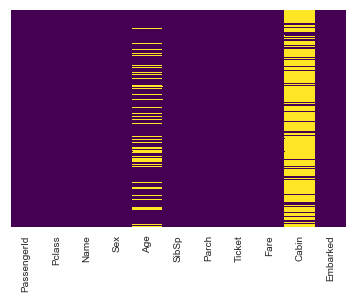

In [339]:
# Pictorial represesentaion : get Info
sns.heatmap(titanic_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [340]:
titanic_test['Age'] = titanic_test[['Age','Pclass']].apply(add_age,axis=1)

KeyError: ('Pclass', 'occurred at index 10')

In [235]:
# converting categrical column using get_dummies
sex = pd.get_dummies(titanic_test['Sex'],drop_first=True)
titanic_test=pd.concat([titanic_test,sex],axis=1)

# converting categrical column using get_dummies
embarked = pd.get_dummies(titanic_test['Embarked'],drop_first=True)
titanic_test=pd.concat([titanic_test,embarked],axis=1)

pclass = pd.get_dummies(titanic_test['Pclass'],drop_first=True)
titanic_test=pd.concat([titanic_test,pclass],axis=1)

In [236]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,0,1


In [237]:
tit3 = titanic_test.drop(['Pclass','Name','Sex','Ticket','Embarked','Cabin'],axis=1)

In [238]:
tit3.head()

,PassengerId,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,892,34.5,0,0,7.8292,1,1,0,0,1
1,893,47.0,1,0,7.0000,0,0,1,0,1
2,894,62.0,0,0,9.6875,1,1,0,1,0
3,895,27.0,0,0,8.6625,1,0,1,0,1
4,896,22.0,1,1,12.2875,0,0,1,0,1


In [239]:
tit3.isnull().count()

PassengerId    418
Age            418
SibSp          418
Parch          418
Fare           418
male           418
Q              418
S              418
2              418
3              418
dtype: int64

In [244]:
fm = tit3['Fare'].mean()
fm

35.6271884892086

In [245]:
tit3['Fare'] = tit3['Fare'].fillna(tit3['Fare'].mean())

In [249]:
tit3.isna().sum()

PassengerId    0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
2              0
3              0
dtype: int64

In [107]:
#tit3.dropna(inplace=True)

In [247]:
test_X = tit3.drop('PassengerId',axis=1)
test_X.head(2)

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1


In [250]:
X_test

,Age,SibSp,Parch,Fare,male,Q,S,2,3,male,Q,S,2,3
511,25.0,0,0,8.0500,1,0,1,0,1,1,0,1,0,1
613,25.0,0,0,7.7500,1,1,0,0,1,1,1,0,0,1
615,24.0,1,2,65.0000,0,0,1,1,0,0,0,1,1,0
337,41.0,0,0,134.5000,0,0,0,0,0,0,0,0,0,0
718,25.0,0,0,15.5000,1,1,0,0,1,1,1,0,0,1
152,55.5,0,0,8.0500,1,0,1,0,1,1,0,1,0,1
826,25.0,0,0,56.4958,1,0,1,0,1,1,0,1,0,1
418,30.0,0,0,13.0000,1,0,1,1,0,1,0,1,1,0
614,35.0,0,0,8.0500,1,0,1,0,1,1,0,1,0,1
241,25.0,1,0,15.5000,0,1,0,0,1,0,1,0,0,1


In [248]:
predictions_test = logreg.predict(test_X)
predictions_test

ValueError: X has 9 features per sample; expecting 14

In [240]:
print(tit3['PassengerId'])

0       892
1       893
2       894
3       895
4       896
5       897
6       898
7       899
8       900
9       901
10      902
11      903
12      904
13      905
14      906
15      907
16      908
17      909
18      910
19      911
20      912
21      913
22      914
23      915
24      916
25      917
26      918
27      919
28      920
29      921
       ... 
388    1280
389    1281
390    1282
391    1283
392    1284
393    1285
394    1286
395    1287
396    1288
397    1289
398    1290
399    1291
400    1292
401    1293
402    1294
403    1295
404    1296
405    1297
406    1298
407    1299
408    1300
409    1301
410    1302
411    1303
412    1304
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 417, dtype: int64


In [136]:
print(final_prediction.head(2))
#print(predictions_test)
type(final_prediction)

   PassengerId  Survived
0          892         0
1          893         0


pandas.core.frame.DataFrame

In [135]:
print(y_test.head(2))
#print(predictions_test)
type(y_test)

511    0
613    0
Name: Survived, dtype: int64


pandas.core.series.Series

In [141]:
final_prediction_s.head(2)

PassengerId    0       892
1       893
2       894
3       89...
Survived       [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, ...
dtype: object

In [242]:
final_prediction.head(4)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0


In [246]:
final_prediction.to_csv('file1.csv', index=False)